#### Airbnb - Part 1 of 3 (Cleaning & Univariate Analysis)

Preprocessing of the raw data. I clean the age and gender fiels specifically as the show show positive correlation with the destination (verified vis hypothesis testing in part 2). This notebook further entails a univariate or on-the-go analysis of the features being cleaned. I made use of some great suggestions made in kaggle kernels, the references for which are listed below. This analysis is by no means exhaustive, it is just an initial eyballing of the data. 

In [1]:
# Import relevant libraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# Load the data
train = pd.read_csv("train_users_2.csv")
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


### Age

In [5]:
print("Null value % in age is: " + "{0:.2%}".format(sum(train.age.isnull())/train.shape[0]))

Null value % in age is: 41.22%


In [6]:
train.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

#### There must be some erroneus values in 'age', as the min = 1 and max = 2014. Let's see a more clear breakdown.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126]),
 <a list of 127 Text xticklabel objects>)

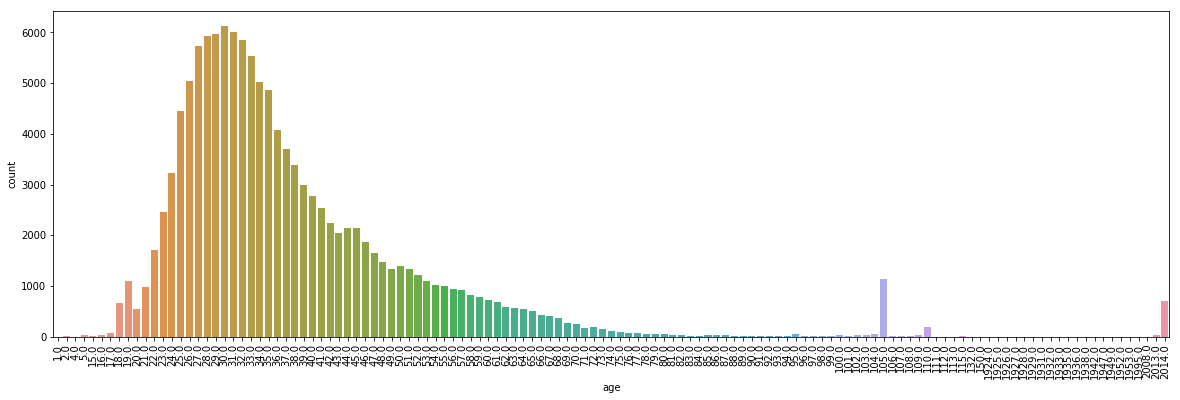

In [7]:
plt.figure(figsize=(20,6))
sns.countplot(train.age)
plt.xticks(rotation=90) 

We know Airbnb has a above 18 years usage, and clearly people of ages 105 and 2014 (which show sigificant bumps) are not using the app. 
#### Let's cleanup these age values and keep out dataset between 18 and 95

In [8]:
train.loc[train.age < 18, 'age'] = np.nan
train.loc[train.age > 95, 'age'] = np.nan

In [9]:
train.age = train.age.replace("NaN", np.nan)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

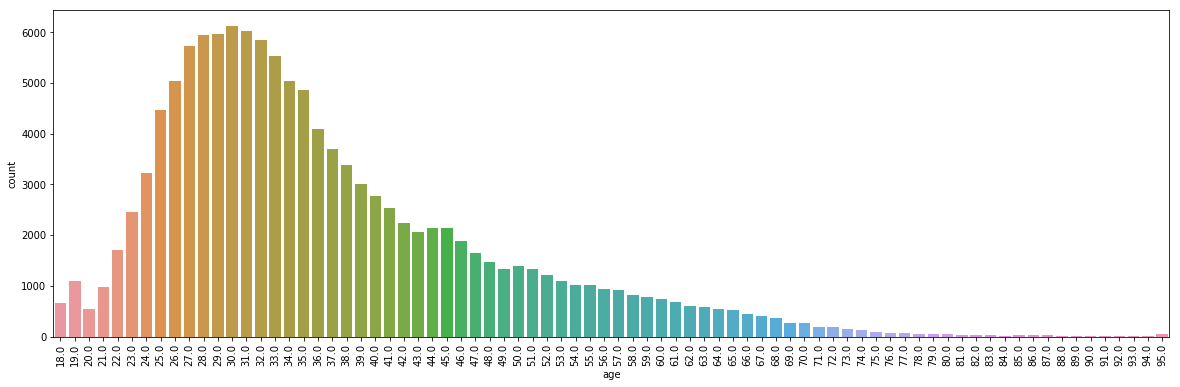

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(train.age)
plt.xticks(rotation=90) 

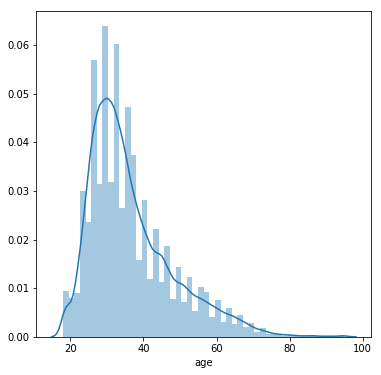

In [11]:
plt.figure(figsize=(6,6))
temp = train.age
sns.distplot(temp.dropna())

In [12]:
temp.dropna().describe()

count    122865.000000
mean         36.529052
std          11.562382
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

###### Median (33) < Mean (36) -- Positive Skewness

In [13]:
print("Now the % of null values in age is: " + "{0:.2%}".format(sum(train.age.isnull())/train.shape[0]))

Now the % of null values in age is: 42.44%


In [14]:
print("% of people with age <= 40: " + "{0:0.2%}".format(sum(train.age <= 40)/sum(train.age.notnull()))
     + "\n% of people with age > 40: "+ "{0:0.2%}".format(sum(train.age > 40)/sum(train.age.notnull())))

% of people with age <= 40: 71.75%
% of people with age > 40: 28.25%


##### Age Notes:
1. ~40% data missing 
2. Majority (~3/4ths) are young or below 40 in remianing

### Gender

In [15]:
print("Null value % in gender is: " + "{0:.2%}".format(sum(train.gender.isnull())/train.shape[0]))

Null value % in gender is: 0.00%


In [16]:
print("Unique values in Gender:",set(train.gender))

Unique values in Gender: {'FEMALE', 'OTHER', 'MALE', '-unknown-'}


Gender has some 'unknown' values which are not 'Other', so we can simply convert them to nan.

In [17]:
train.gender.replace('-unknown-', np.nan, inplace=True)

In [18]:
print("Unique values in Gender:",set(train.gender))

Unique values in Gender: {nan, 'FEMALE', 'MALE', 'OTHER'}


In [19]:
print("New null value % in gender is: " + "{0:.2%}".format(sum(train.gender.isnull())/train.shape[0]))

New null value % in gender is: 44.83%


Just like age, the null% in gender is also high, which is cancern that will need to be addressed in terms of modelling later on.

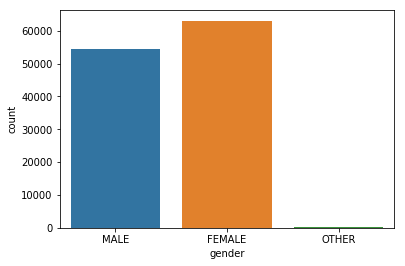

In [20]:
sns.countplot(train.gender)

In [21]:
print(train.gender.value_counts()/sum(train.gender.notnull())*100)

FEMALE    53.532094
MALE      46.228442
OTHER      0.239464
Name: gender, dtype: float64


###### Gender Notes:
1. ~45% data missing 
2. Majority (53%) are Feamles in remianing
3. <0.2% are Other

### Language

In [22]:
print("Null value % in language is: " + "{0:.2%}".format(sum(train.language.isnull())/train.shape[0]))

Null value % in language is: 0.00%


In [23]:
print(set(train.language))

{'nl', 'ca', 'is', 'en', 'ko', 'id', 'cs', 'pl', 'it', 'tr', 'fi', 'el', 'hr', 'no', 'da', 'sv', 'hu', 'de', 'ja', 'pt', 'zh', 'fr', 'th', 'ru', 'es'}


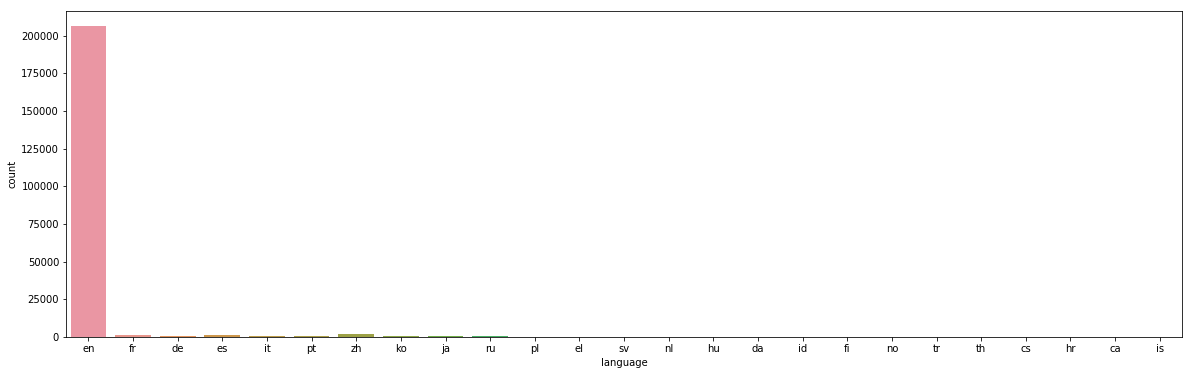

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(train.language)

In [25]:
for i in set(train.language):
    print(i,": " + "{0:.2%}".format(sum(train.language == i)/sum(train.language.notnull())))

nl : 0.05%
ca : 0.00%
is : 0.00%
en : 96.66%
ko : 0.35%
id : 0.01%
cs : 0.01%
pl : 0.03%
it : 0.24%
tr : 0.03%
fi : 0.01%
el : 0.01%
hr : 0.00%
no : 0.01%
da : 0.03%
sv : 0.06%
hu : 0.01%
de : 0.34%
ja : 0.11%
pt : 0.11%
zh : 0.76%
fr : 0.55%
th : 0.01%
ru : 0.18%
es : 0.43%


##### Language Notes:
1. No missing Data
2. Majority (~95%) are English speakers in remianing

### Country Destination

In [26]:
print(set(train.country_destination))

{'CA', 'NL', 'NDF', 'other', 'GB', 'ES', 'DE', 'US', 'FR', 'PT', 'AU', 'IT'}


In [27]:
print("Null % is: " + "{0:0.2%}".format(sum(train.country_destination.isnull())/train.shape[0]))

Null % is: 0.00%


Note: 'NDF' or No Destination Found is differnt from 'Other' (apart from the ones mentioned) and nan/null values

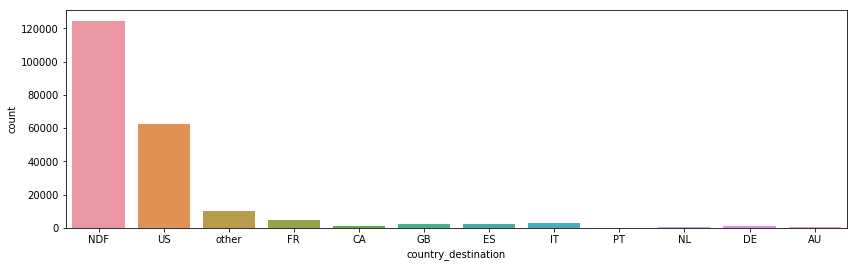

In [28]:
plt.figure(figsize=(14,4))
sns.countplot(train.country_destination)

In [29]:
print(train.country_destination.value_counts()/sum(train.country_destination.notnull())*100)

NDF      58.347349
US       29.222632
other     4.728954
FR        2.353233
IT        1.328174
GB        1.088774
ES        1.053638
CA        0.669006
DE        0.497070
NL        0.356991
AU        0.252517
PT        0.101663
Name: country_destination, dtype: float64


##### Destination Country Notes:
1. Majority (~60%) is NDF
2. Second Highest is US (~30%), rest of the countries are in single digits or even less than that

### Signup Method, App, and Flow

In [30]:
print("Signup Method null % is: " + "{0:0.2%}".format(sum(train.signup_method.isnull())/train.shape[0]))
print("Signup Flow null % is: " + "{0:0.2%}".format(sum(train.signup_flow.isnull())/train.shape[0]))
print("Signup App null % is: " + "{0:0.2%}".format(sum(train.signup_app.isnull())/train.shape[0]))

Signup Method null % is: 0.00%
Signup Flow null % is: 0.00%
Signup App null % is: 0.00%


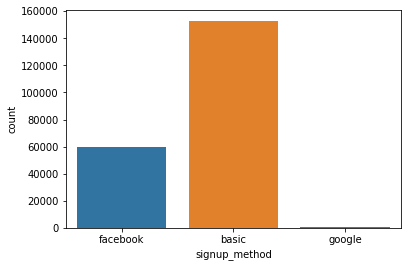

In [31]:
sns.countplot(train.signup_method)

In [32]:
print(train.signup_method.value_counts()/sum(train.signup_method.notnull())*100)

basic       71.630960
facebook    28.113244
google       0.255796
Name: signup_method, dtype: float64


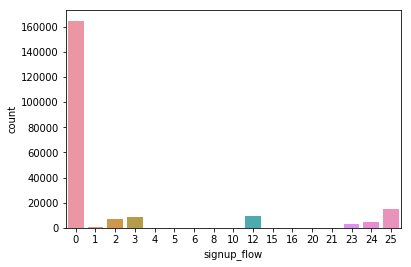

In [33]:
sns.countplot(train.signup_flow)

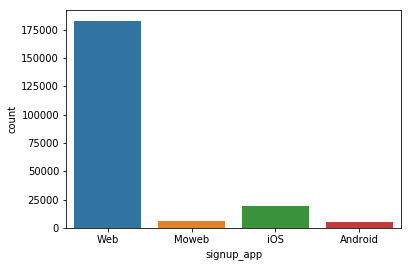

In [34]:
sns.countplot(train.signup_app)

In [35]:
print(train.signup_app.value_counts()/sum(train.signup_app.notnull())*100)

Web        85.601379
iOS         8.910242
Moweb       2.933226
Android     2.555153
Name: signup_app, dtype: float64


#### Signup Method, App, and Flow Notes:
2. Basic method is at ~70% and Facebook at ~28%, and Google is almost non-existent
3. Signup Flow seems irrelvant at this point, maybe in bivariate or multivariate analysis it will interplay with a feature
4. Web seems to be the predominant signup app (~85%), with others in single digits

### Affiliate Channel, Affiliate Provider, First Affiliate Tracked

In [36]:
print("Affiliate Channel null % is: " + "{0:0.2%}".format(sum(train.affiliate_channel.isnull())/train.shape[0]))
print("Affiliate Provider null % is: " + "{0:0.2%}".format(sum(train.affiliate_provider.isnull())/train.shape[0]))
print("First Affiliate Tracked null % is: " + "{0:0.2%}".format(sum(train.first_affiliate_tracked.isnull())/train.shape[0]))

Affiliate Channel null % is: 0.00%
Affiliate Provider null % is: 0.00%
First Affiliate Tracked null % is: 2.84%


In [37]:
print("Channel: ",set(train.affiliate_channel), "\nProvider: ", 
      set(train.affiliate_provider), "\nFirst Tracked: ",set(train.first_affiliate_tracked))

Channel:  {'api', 'direct', 'other', 'remarketing', 'content', 'sem-brand', 'sem-non-brand', 'seo'} 
Provider:  {'bing', 'other', 'yahoo', 'facebook-open-graph', 'gsp', 'baidu', 'daum', 'google', 'facebook', 'meetup', 'email-marketing', 'wayn', 'naver', 'yandex', 'craigslist', 'vast', 'direct', 'padmapper'} 
First Tracked:  {nan, 'untracked', 'omg', 'linked', 'tracked-other', 'product', 'marketing', 'local ops'}


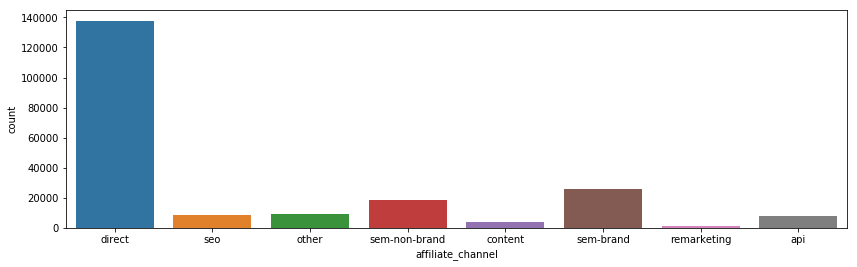

In [38]:
plt.figure(figsize=(14,4))
sns.countplot(train.affiliate_channel)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

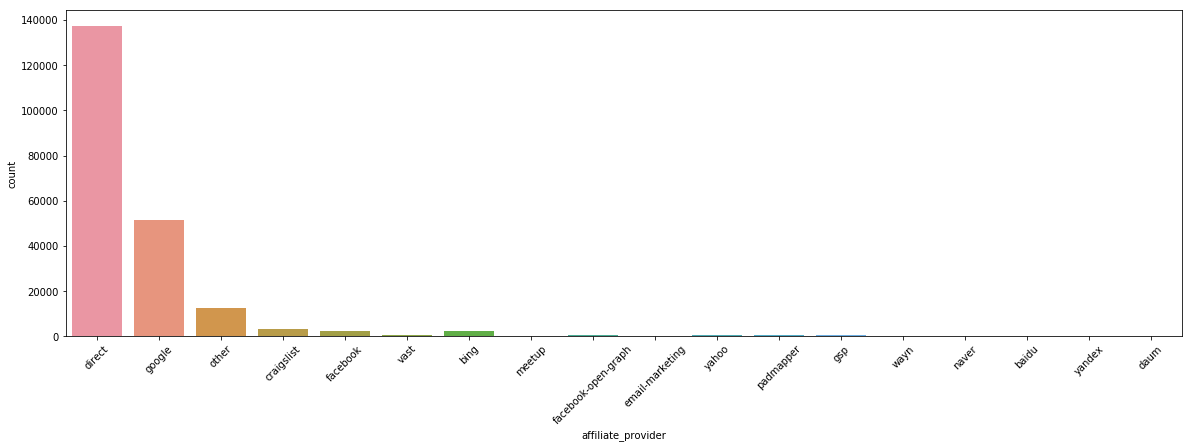

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(train.affiliate_provider)
plt.xticks(rotation=45) 

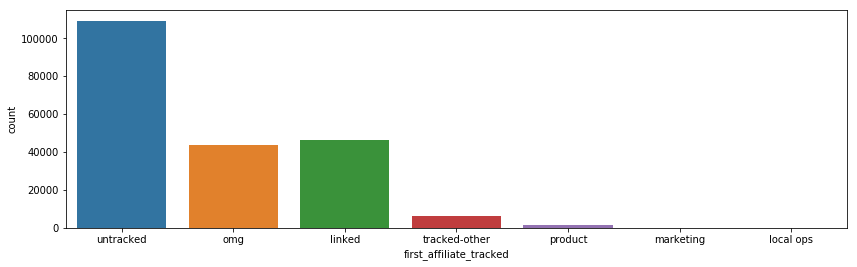

In [40]:
plt.figure(figsize=(14,4))
sns.countplot(train.first_affiliate_tracked)

#### Affiliate Channel, Affiliate Provider, First Affiliate Tracked:
1. None to low Null Values
2. Values dont necessarily seem relvant at this point, maybe in bivariate or multivariate analysis they will interplay with a feature

### First Device Type,	First Browser

In [41]:
print("First Device Type null % is: " + "{0:0.2%}".format(sum(train.first_device_type.isnull())/train.shape[0]))
print("First Browser null % is: " + "{0:0.2%}".format(sum(train.first_browser.isnull())/train.shape[0]))

First Device Type null % is: 0.00%
First Browser null % is: 0.00%


In [42]:
print("First Device Type: ",set(train.first_device_type), "\nFirst Browser: ", 
      set(train.first_browser))

First Device Type:  {'Windows Desktop', 'SmartPhone (Other)', 'Android Phone', 'iPhone', 'Android Tablet', 'iPad', 'Mac Desktop', 'Desktop (Other)', 'Other/Unknown'} 
First Browser:  {'Maxthon', 'Crazy Browser', 'NetNewsWire', 'Opera Mini', 'TheWorld Browser', 'SiteKiosk', 'Flock', 'Opera Mobile', 'Conkeror', 'wOSBrowser', 'Yandex.Browser', 'Chromium', 'Comodo Dragon', 'IceDragon', 'TenFourFox', 'BlackBerry Browser', 'RockMelt', 'PS Vita browser', 'Silk', 'Outlook 2007', 'Android Browser', 'Mobile Safari', 'Mozilla', 'AOL Explorer', 'Chrome Mobile', 'Stainless', 'Googlebot', 'Arora', 'OmniWeb', 'Mobile Firefox', 'Sogou Explorer', 'Iron', 'Pale Moon', 'Opera', 'Chrome', 'Kindle Browser', 'CometBird', 'SlimBrowser', 'Avant Browser', 'Epic', 'Safari', 'CoolNovo', '-unknown-', 'IE Mobile', 'Apple Mail', 'SeaMonkey', 'IE', 'IceWeasel', 'Google Earth', 'Firefox', 'Palm Pre web browser', 'Camino'}


In [43]:
train.first_browser.replace('-unknown-',np.nan,inplace=True)

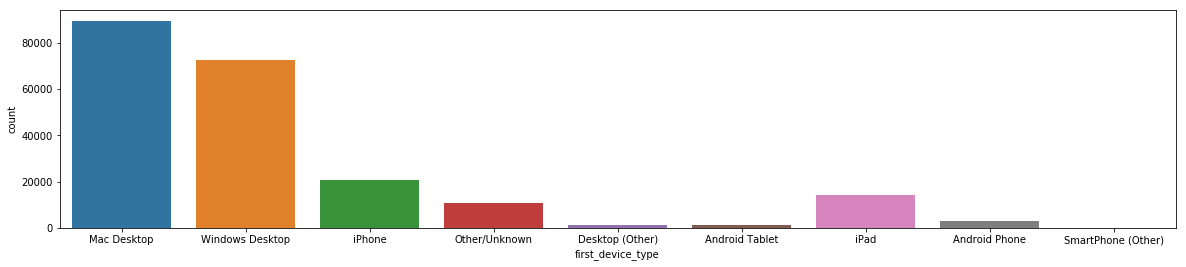

In [44]:
plt.figure(figsize=(20,4))
sns.countplot(train.first_device_type)

In [45]:
print(train.first_device_type.value_counts()/sum(train.first_device_type.notnull())*100)

Mac Desktop           41.976847
Windows Desktop       34.066835
iPhone                 9.725417
iPad                   6.717701
Other/Unknown          4.997400
Android Phone          1.313182
Android Tablet         0.605291
Desktop (Other)        0.561721
SmartPhone (Other)     0.035605
Name: first_device_type, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

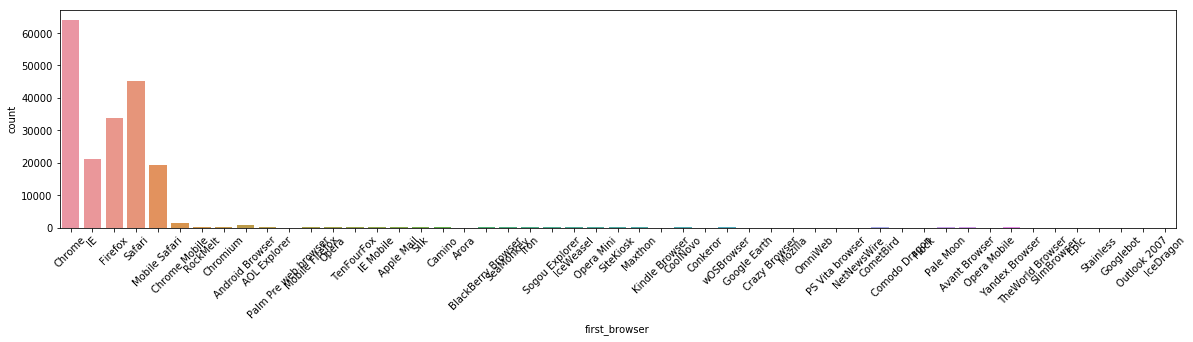

In [46]:
plt.figure(figsize=(20,4))
sns.countplot(train.first_browser)
plt.xticks(rotation=45) 

In [47]:
print(train.first_browser.value_counts()/sum(train.first_browser.notnull())*100)

Chrome                  34.291162
Safari                  24.260279
Firefox                 18.076107
IE                      11.315627
Mobile Safari           10.352069
Chrome Mobile            0.682117
Android Browser          0.457072
AOL Explorer             0.131590
Opera                    0.100975
Silk                     0.066600
Chromium                 0.039208
BlackBerry Browser       0.028466
Maxthon                  0.024707
IE Mobile                0.019336
Apple Mail               0.019336
Sogou Explorer           0.017724
Mobile Firefox           0.016113
RockMelt                 0.012890
SiteKiosk                0.012890
Iron                     0.009131
IceWeasel                0.006982
Pale Moon                0.006445
SeaMonkey                0.005908
CometBird                0.005908
Yandex.Browser           0.005908
Camino                   0.004834
TenFourFox               0.004297
wOSBrowser               0.003223
CoolNovo                 0.003223
Avant Browser 

#### First Device Type,	First Browser:
Both major device types and browser seem in propotion to the popular devices and browsers.

### Date Account Created, Timestamp First Active, Date First Booking

In [48]:
print("Date Account Created % is: " + "{0:0.2%}".format(sum(train.date_account_created.isnull())/train.shape[0]))
print("Timestamp First Active null % is: " + "{0:0.2%}".format(sum(train.timestamp_first_active.isnull())/train.shape[0]))
print("Date First Booking % is: " + "{0:0.2%}".format(sum(train.date_first_booking.isnull())/train.shape[0]))

Date Account Created % is: 0.00%
Timestamp First Active null % is: 0.00%
Date First Booking % is: 58.35%


In [49]:
train.date_account_created = pd.to_datetime(train.date_account_created)
# print(train.date_account_created)

(array([   0,    1,    2, ..., 1631, 1632, 1633]),
 <a list of 1634 Text xticklabel objects>)

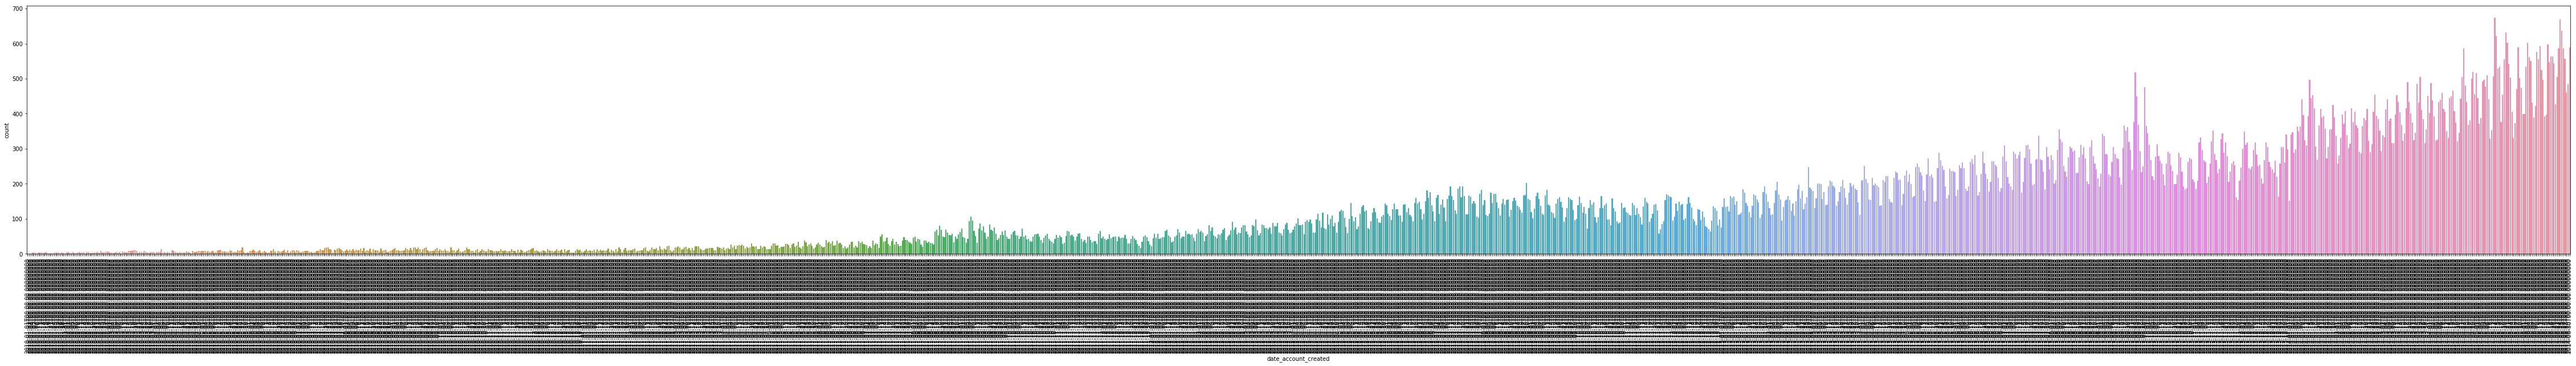

In [50]:
plt.figure(figsize=(80,8))
sns.countplot(train.date_account_created)
plt.xticks(rotation=90)

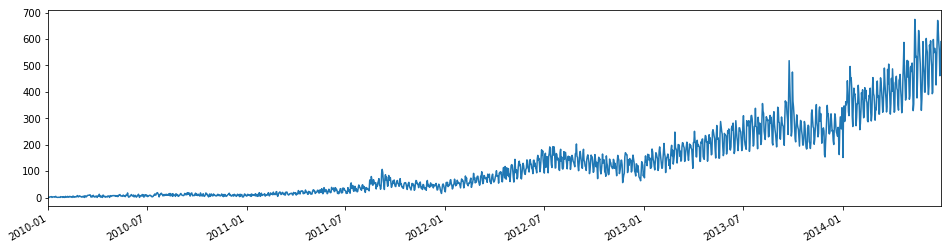

In [51]:
plt.figure(figsize=(16,4))
train.date_account_created.value_counts().plot(kind='line')

In [52]:
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active//1000000, format='%Y%m%d')
# print(train.timestamp_first_active)

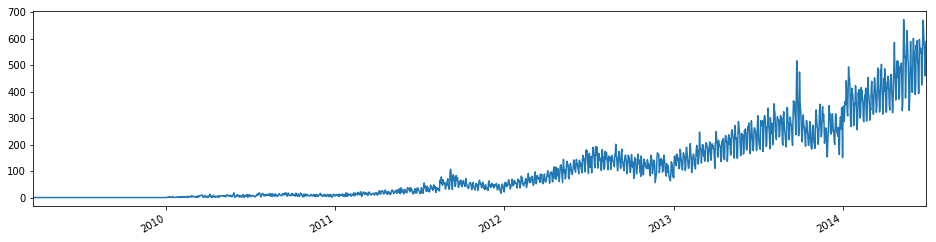

In [53]:
plt.figure(figsize=(16,4))
train.timestamp_first_active.value_counts().plot(kind='line')

In [54]:
train.date_first_booking = pd.to_datetime(train.date_first_booking)

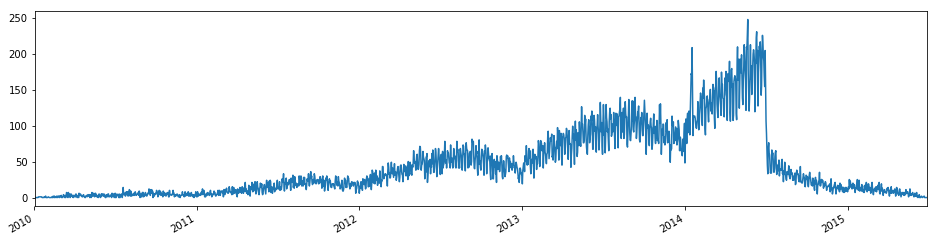

In [55]:
plt.figure(figsize=(16,4))
train.date_first_booking.value_counts().plot(kind='line')

#### Date Account Created, Timestamp First Active, Date First Booking:
1. First booking date has about ~50% missing data
2. Timeseries plots of Timestamp and First active look similar at a high level, and may prove correlated in a bivariate analysis.

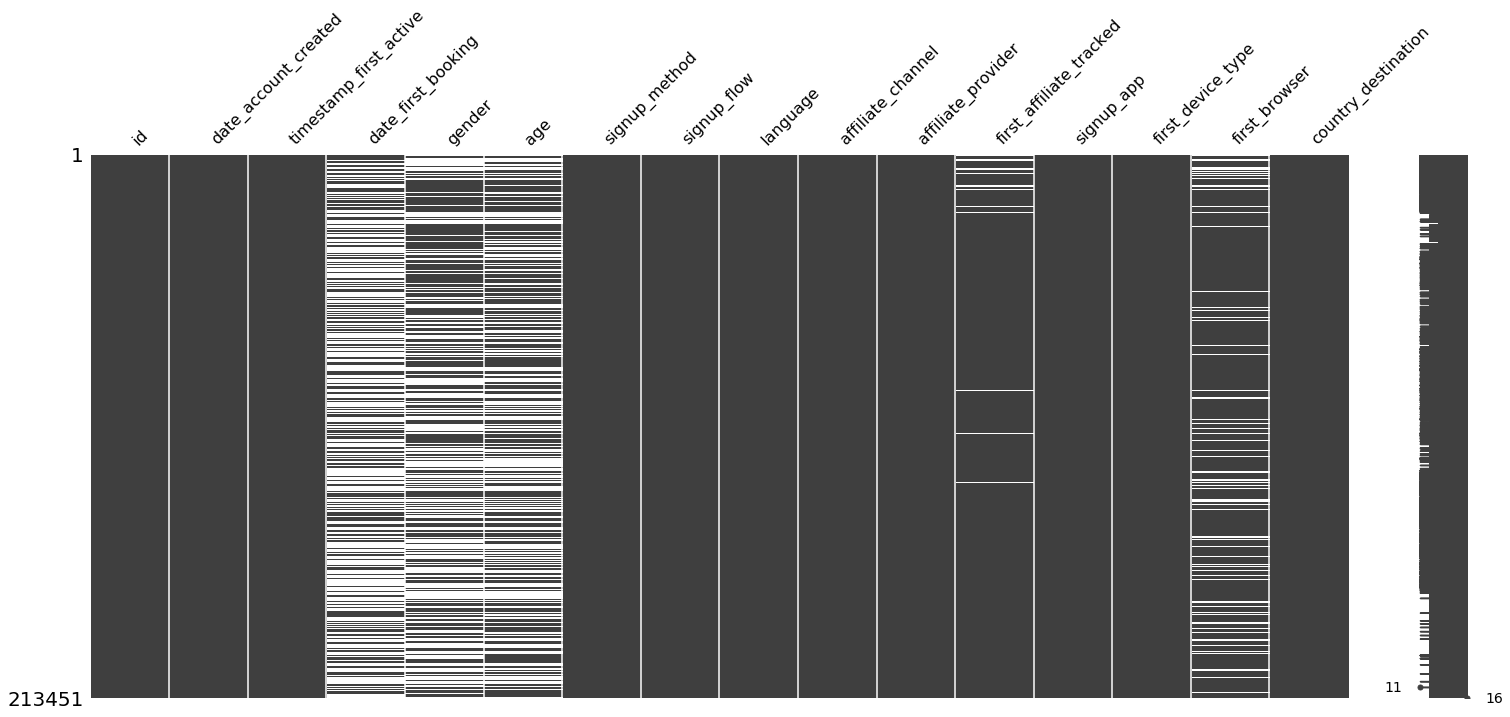

In [56]:
# An overarching look at the missing data
msno.matrix(train)

In [59]:
train.to_csv('train_users_3.csv',index=False)

#### References

1. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
2. https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
3. https://www.kaggle.com/justk1/airbnb
4. https://www.kaggle.com/davidgasquez/user-data-exploration
5. https://www.kaggle.com/kevinwu06/airbnb-exploratory-analysis
6. https://www.kaggle.com/rounakbanik/airbnb-new-user-bookings

##### - Aditya